In [2]:
# Testing colour science library for producing truly perceptually uniform colour schemes
# Also I like that it uses the British spelling of colour ;)

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import colour

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.7.9 (default, Aug 31 2020, 07:22:35)                       *
*                [Clang 10.0.0 ]                                              *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.15                                                       *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.9.0                                                       *
*       matplotlib : 3.3.1                                                    *
*       networkx : 2.5                                                        *
*       numpy : 1.19.1                  

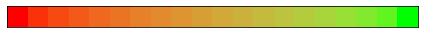

['#fe0000' '#fb3209' '#f74811' '#f35918' '#ef671e' '#ea7423' '#e67f28'
 '#e18a2c' '#dc9430' '#d79e34' '#d1a738' '#cbb03b' '#c4b93d' '#bcc23e'
 '#b2cc3d' '#a6d53a' '#97df36' '#82e92e' '#62f321' '#00ff00']


/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


In [6]:
# Test the colour scheme generation
CAM16UCS = colour.convert(['#ff0000', '#00ff00'], 'Hexadecimal', 'CAM16UCS')
gradient = colour.utilities.lerp(
    CAM16UCS[0][np.newaxis],
    CAM16UCS[1][np.newaxis],
    np.linspace(0, 1, 20)[..., np.newaxis])
RGB = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')

colour.plotting.plot_multi_colour_swatches(
    [colour.plotting.ColourSwatch(RGB=np.clip(x, 0, 1)) for x in RGB])

print(colour.convert(RGB, 'Output-Referred RGB', 'Hexadecimal'))

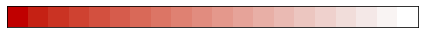

['#bf0000' '#c52014' '#ca3223' '#ce4231' '#d24f3e' '#d65c4b' '#d96858'
 '#dc7465' '#de8072' '#e18c7f' '#e3978b' '#e5a398' '#e7aea5' '#e9bab2'
 '#ecc5bf' '#eed1cc' '#f1dcd9' '#f4e8e6' '#f8f3f3' '#ffffff']


/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


In [14]:
# Test the colour scheme generation
CAM16UCS = colour.convert(['#c00000', '#ffffff'], 'Hexadecimal', 'CAM16UCS')
gradient = colour.utilities.lerp(
    CAM16UCS[0][np.newaxis],
    CAM16UCS[1][np.newaxis],
    np.linspace(0, 1, 20)[..., np.newaxis])
RGB = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')

colour.plotting.plot_multi_colour_swatches(
    [colour.plotting.ColourSwatch(RGB=np.clip(x, 0, 1)) for x in RGB])

print(colour.convert(RGB, 'Output-Referred RGB', 'Hexadecimal'))

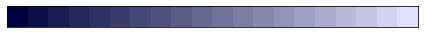

['#000040' '#0c0f47' '#181c50' '#242759' '#2f3262' '#393d6b' '#444774'
 '#4e527e' '#595c87' '#646791' '#6f719a' '#7a7ca4' '#8587ae' '#9193b9'
 '#9d9fc3' '#aaabce' '#b6b7da' '#c4c4e5' '#d1d2f2' '#e0e0ff']


/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


In [12]:
# Test the colour scheme generation
CAM16UCS = colour.convert(['#000040', '#e0e0ff'], 'Hexadecimal', 'CAM16UCS')
gradient = colour.utilities.lerp(
    CAM16UCS[0][np.newaxis],
    CAM16UCS[1][np.newaxis],
    np.linspace(0, 1, 20)[..., np.newaxis])
RGB = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')

colour.plotting.plot_multi_colour_swatches(
    [colour.plotting.ColourSwatch(RGB=np.clip(x, 0, 1)) for x in RGB])

print(colour.convert(RGB, 'Output-Referred RGB', 'Hexadecimal'))

In [15]:
colour.utilities.lerp?

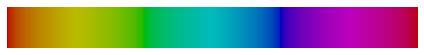

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


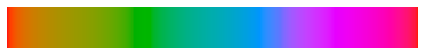

In [16]:
def colour_stripe(S=1, samples=360):
    H = np.linspace(0, 1, samples)

    HSV = colour.utilities.tstack([H, np.ones(samples) * S, np.ones(samples)])
    RGB = colour.HSV_to_RGB(HSV)
 
    return RGB[np.newaxis, ...]


RGB = np.resize(colour_stripe(), [36, 360, 3])

colour.plotting.plot_image(colour.cctf_encoding(RGB * 0.5));

CAM16 = colour.convert(RGB, 'RGB', 'CAM16')
CAM16_UL = colour.CAM16_Specification(
    np.full(CAM16.J.shape, 0.5), CAM16.C, CAM16.h)

RGB_PU = colour.convert(CAM16_UL, 'CAM16', 'RGB')

colour.plotting.plot_image(colour.cctf_encoding(RGB_PU));

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


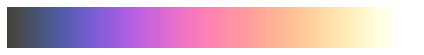

In [361]:
CAM16_PUL = colour.CAM16_Specification(
    np.tile(np.linspace(0.2,1.1,CAM16.J.shape[1]), 
            (CAM16.J.shape[0],1)), 
    np.tile(np.linspace(-0.5,0.5,CAM16.J.shape[1]), 
            (CAM16.J.shape[0],1))**2*3-0.7, 
    np.tile(np.linspace(0.2,0.8,CAM16.J.shape[1]), 
            (CAM16.J.shape[0],1))%1.)

RGB_PUL = colour.convert(CAM16_PUL, 'CAM16', 'RGB')

colour.plotting.plot_image(colour.cctf_encoding(RGB_PUL));

In [365]:
CAM16_PUL.J

array([[ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ],
       [ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ],
       [ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ],
       ..., 
       [ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ],
       [ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ],
       [ 0.2       ,  0.20250696,  0.20501393, ...,  1.09498607,
         1.09749304,  1.1       ]])

In [62]:
from matplotlib import cm, colors, gridspec

In [68]:
test_ds = xr.load_dataset('/Users/jonesw/python/example_notebooks/data/GOES16/ABI-L2-MCMIPC/2018/170/19/OR_ABI-L2-MCMIPC-M3_G16_s20181701902246_e20181701905019_c20181701905135.nc')

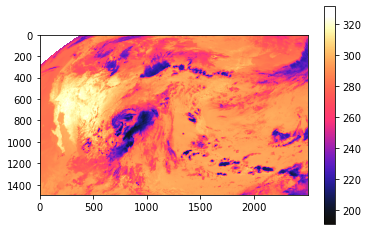

In [104]:
test_cmap = colors.ListedColormap(np.maximum(np.minimum(RGB_PUL[0],1),0))
plt.imshow(test_ds.CMI_C13, cmap=test_cmap)
plt.colorbar()

In [52]:
colour.delta_E?

In [51]:
CAM16_PUL

CAM16_Specification(J=array([[ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ],
       [ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ],
       [ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ],
       ..., 
       [ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ],
       [ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ],
       [ 0.2       ,  0.20194986,  0.20389972, ...,  0.89610028,
         0.89805014,  0.9       ]]), C=array([[ 0.05      ,  0.04166673,  0.03338002, ...,  0.03338002,
         0.04166673,  0.05      ],
       [ 0.05      ,  0.04166673,  0.03338002, ...,  0.03338002,
         0.04166673,  0.05      ],
       [ 0.05      ,  0.04166673,  0.03338002, ...,  0.03338002,
         0.04166673,  0.05      ],
       ..., 
       [ 0.05      ,  0.04166673,  0.03338002, .

-5.0


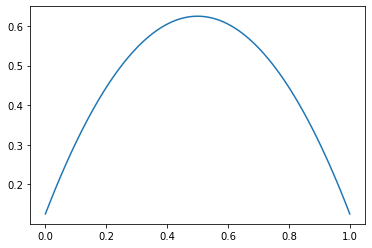

In [636]:
a=-2
b=2
c=0.125
print(-b**2 + 4*a*c)
M = lambda x: np.minimum(np.maximum(a*x**2 + b*x+c,0),1)
plt.plot(np.linspace(0,1,100),M(np.linspace(0,1,100)))

In [730]:
c_1=np.pi*1.5
c_2=0
test_x = np.array([0,0.25,0.5,0.75,1])
H = lambda x : ((2 * ((-b**2 + 4*a*c))**-0.5 * np.arctan(((-b**2 + 4*a*c))**-0.5 * (b + 2*a*x))*c_1+c_2))
H(test_x)

array([-6.08476305 -1.52678670e-15j, -2.02825435 -2.68470062e-16j,
        0.00000000 +0.00000000e+00j,  2.02825435 +2.68470062e-16j,
        6.08476305 +1.52678670e-15j])

In [731]:
def H1(x):
    return ( -1 * ( ( ( b )**( 2 ) + -4 * a * c ) )**( -1/2 ) * ( c + x * ( b + \
a * x ) ) * ( ( ( c + x * ( b + a * x ) ) )**( 2 ) )**( -1/2 ) * ( 2 \
* ( ( ( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) * np.arctan( ( -1 * b + \
-2 * a * x ) * ( ( -1 * ( b )**( 2 ) + ( c_1 + ( -4 * a * b * x + -4 * \
( a )**( 2 ) * ( x )**( 2 ) ) ) ) )**( -1/2 ) ) + ( ( ( b )**( 2 ) + \
( -4 * a * c + -1 * c_1 ) ) )**( 1/2 ) * ( -1 * np.arctan( ( ( ( b )**( \
2 ) + ( -4 * a * c + -1 * c_1 ) ) )**( -1/2 ) * ( -1 * b * ( ( ( b )**( \
2 ) + -4 * a * c ) )**( 1/2 ) + ( c_1 + -2 * a * ( ( ( b )**( 2 ) + -4 \
* a * c ) )**( 1/2 ) * x ) ) * ( ( -1 * ( b )**( 2 ) + ( c_1 + ( -4 * a \
* b * x + -4 * ( a )**( 2 ) * ( x )**( 2 ) ) ) ) )**( -1/2 ) ) + \
np.arctan( ( ( ( b )**( 2 ) + ( -4 * a * c + -1 * c_1 ) ) )**( -1/2 ) * \
( b * ( ( ( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) + ( c_1 + 2 * a * ( ( \
( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) * x ) ) * ( ( -1 * ( b )**( 2 \
) + ( c_1 + ( -4 * a * b * x + -4 * ( a )**( 2 ) * ( x )**( 2 ) ) ) ) \
)**( -1/2 ) ) ) ) + c_2 )
H1(test_x)

array([ 2.09501782,  0.89807144,  0.        , -0.89807144, -2.09501782])

In [732]:
def H2(x):
    return ( ( ( ( b )**( 2 ) + -4 * a * c ) )**( -1/2 ) * ( c + x * ( b + a * x \
) ) * ( ( ( c + x * ( b + a * x ) ) )**( 2 ) )**( -1/2 ) * ( 2 * ( ( \
( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) * np.arctan( ( -1 * b + -2 * a \
* x ) * ( ( -1 * ( b )**( 2 ) + ( c_1 + ( -4 * a * b * x + -4 * ( a \
)**( 2 ) * ( x )**( 2 ) ) ) ) )**( -1/2 ) ) + ( ( ( b )**( 2 ) + ( -4 \
* a * c + -1 * c_1 ) ) )**( 1/2 ) * ( -1 * np.arctan( ( ( ( b )**( 2 ) \
+ ( -4 * a * c + -1 * c_1 ) ) )**( -1/2 ) * ( -1 * b * ( ( ( b )**( 2 ) \
+ -4 * a * c ) )**( 1/2 ) + ( c_1 + -2 * a * ( ( ( b )**( 2 ) + -4 * a \
* c ) )**( 1/2 ) * x ) ) * ( ( -1 * ( b )**( 2 ) + ( c_1 + ( -4 * a * b \
* x + -4 * ( a )**( 2 ) * ( x )**( 2 ) ) ) ) )**( -1/2 ) ) + \
np.arctan( ( ( ( b )**( 2 ) + ( -4 * a * c + -1 * c_1 ) ) )**( -1/2 ) * \
( b * ( ( ( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) + ( c_1 + 2 * a * ( ( \
( b )**( 2 ) + -4 * a * c ) )**( 1/2 ) * x ) ) * ( ( -1 * ( b )**( 2 \
) + ( c_1 + ( -4 * a * b * x + -4 * ( a )**( 2 ) * ( x )**( 2 ) ) ) ) )**(\
 -1/2 ) ) ) ) + c_2 )
H2(test_x)

array([-2.09501782, -0.89807144,  0.        ,  0.89807144,  2.09501782])

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


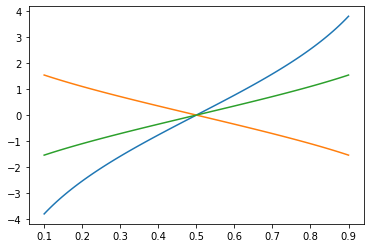

In [733]:
plt.plot(np.linspace(0.1,0.9,100),H(np.linspace(0.1,0.9,100)))
plt.plot(np.linspace(0.1,0.9,100),H1(np.linspace(0.1,0.9,100)))
plt.plot(np.linspace(0.1,0.9,100),H2(np.linspace(0.1,0.9,100)))

In [734]:
def get_ucs_ab(x, M_func, H_func):
    m = M_func(x)
    h = H_func(x)
    a = m*np.cos(h)
    b = m*np.sin(h)
    return a, b

In [735]:
x = np.linspace(0,1,CAM16.J.shape[1])

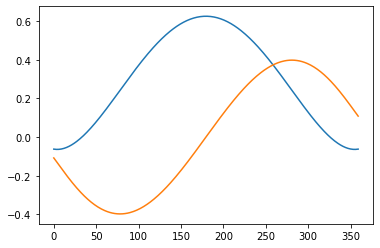

In [736]:
plt.plot(np.array(get_ucs_ab(x,M,H2)).T)

In [746]:
Jpapbp = np.stack([np.linspace(0.1,1.5,256), *get_ucs_ab(np.linspace(0.1,0.9,256),M,H1)],-1)

In [747]:
test_cam16 = colour.CAM16UCS_to_JMh_CAM16(Jpapbp)

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


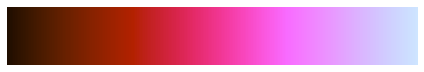

In [748]:
CAM_test = colour.CAM16_Specification(J = np.tile(test_cam16[...,0], (36,1)), 
                                      M = np.tile(test_cam16[...,1], (36,1)), 
                                      h = np.tile(test_cam16[...,2], (36,1))/360)
RGB_test = colour.convert(CAM_test, 'CAM16', 'RGB')

colour.plotting.plot_image(colour.cctf_encoding(RGB_test));

In [749]:
test_image = np.linspace(0,1,256)+np.sin(np.linspace(0,128*np.pi,256))*np.linspace(0.05,0,64)[:,np.newaxis]

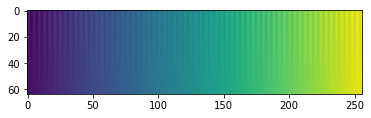

In [750]:
plt.imshow(test_image, cmap='viridis')

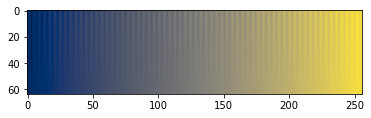

In [751]:
plt.imshow(test_image, cmap='cividis')

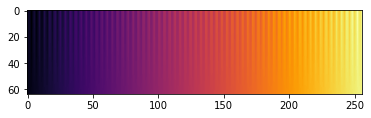

In [752]:
plt.imshow(test_image, cmap='inferno')

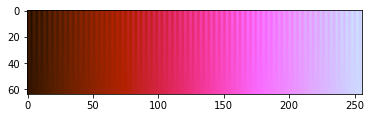

In [935]:
test_cmap = colors.ListedColormap(np.maximum(np.minimum(colour.cctf_encoding(RGB_test)[0],1),0))
plt.imshow(test_image, cmap=test_cmap)

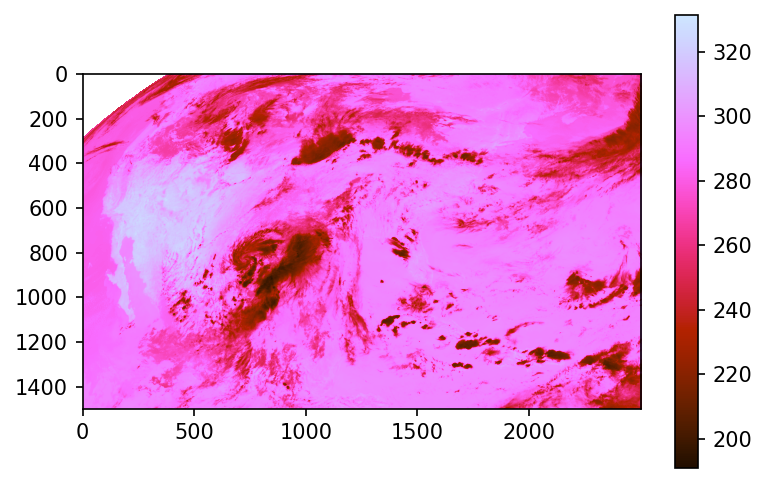

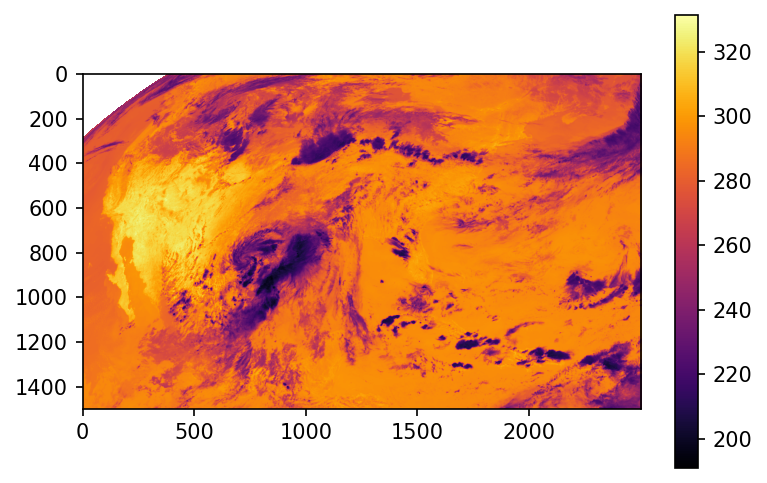

In [936]:
plt.figure(dpi=150)
plt.imshow(test_ds.CMI_C13, cmap=test_cmap)
plt.colorbar()
plt.figure(dpi=150)
plt.imshow(test_ds.CMI_C13, cmap='inferno')
plt.colorbar()

In [394]:
colour.CAM16_Specification?

In [512]:
colour.CAM16UCS_to_JMh_CAM16?

In [457]:
colour.CAM02UCS_to_JMh_CIECAM02?

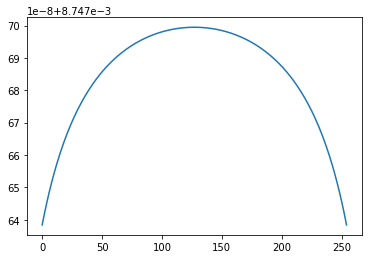

In [755]:
plt.plot(colour.difference.delta_E_CAM16UCS(Jpapbp[:-1], Jpapbp[1:]))

(0.0, 0.1)

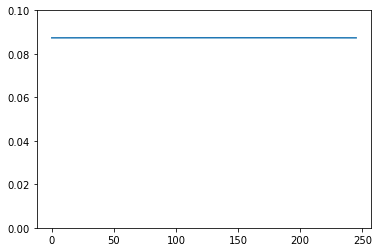

In [759]:
plt.plot(colour.difference.delta_E_CAM16UCS(Jpapbp[:-10], Jpapbp[10:]))
plt.ylim(ymin=0)
plt.ylim(ymax=0.1)

In [978]:
j = np.linspace(0.2,1.4,256)
quad = lambda x,a,b,c: a*x**2 + b*x+c
m = quad(np.linspace(0,1,256),-2,2,0)+0.05

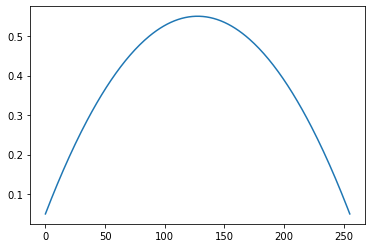

In [979]:
plt.plot(m)

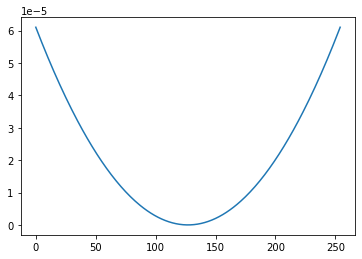

In [980]:
dm = m[1:]-m[:-1]
plt.plot(dm**2)

In [981]:
k = 1e-4

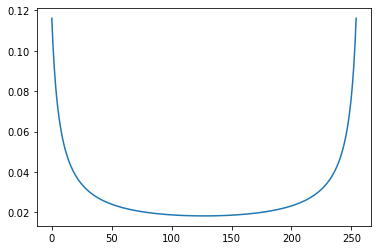

In [982]:
mm = m[1:]*m[:-1]
dh = np.sqrt((k-dm**2)/mm)
plt.plot(dh)

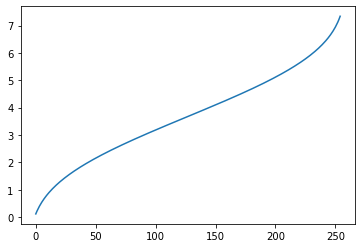

In [983]:
plt.plot(np.cumsum(dh))

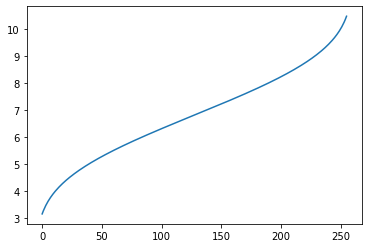

In [984]:
hi = np.pi
h = np.concatenate([[hi],hi+np.cumsum(dh)])
plt.plot(h)

In [985]:
def get_ab(m,h):
    a = m*np.cos(h)
    b = m*np.sin(h)
    return a, b

In [986]:
a, b = get_ab(m,h)

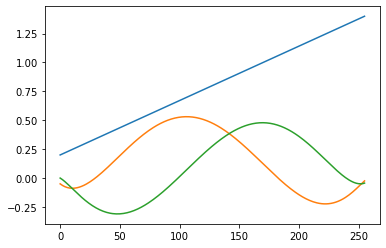

In [987]:
plt.plot(j)
plt.plot(a)
plt.plot(b)

In [994]:
def ucs_to_rgb_cmap(j,a,b):
    jab = np.stack([j,a,b],-1)
    cam16 = colour.CAM16UCS_to_JMh_CAM16(jab)
    CAM_spec = colour.CAM16_Specification(J = cam16[...,0], 
                                          M = cam16[...,1], 
                                          h = cam16[...,2]/360)
    RGB = colour.convert(CAM_spec, 'CAM16', 'RGB')
    cmap = colors.ListedColormap(np.maximum(np.minimum(colour.cctf_encoding(RGB),1),0))
    return cmap


In [1023]:
def rgb_to_jab(rgb):
    c16spec = colour.convert(colour.cctf_decoding(rgb), 'RGB', 'CAM16')
    jab = colour.JMh_CAM16_to_CAM16UCS(np.stack([c16spec.J, c16spec.M, c16spec.h*360],-1))
    return jab

def jab_to_rgb(jab):
    cam16 = colour.CAM16UCS_to_JMh_CAM16(jab)
    CAM_spec = colour.CAM16_Specification(J = cam16[...,0], 
                                          M = cam16[...,1], 
                                          h = cam16[...,2]/360)
    rgb = colour.cctf_encoding(colour.convert(CAM_spec, 'CAM16', 'RGB'))
    return rgb


In [989]:
def get_cmap_deltae(cmap):
    rgb = cmap(np.linspace(0,1,256))[...,:3]
    c16spec = colour.convert(colour.cctf_decoding(rgb), 'RGB', 'CAM16')
    jab = colour.JMh_CAM16_to_CAM16UCS(np.stack([c16spec.J, c16spec.M, c16spec.h*360],-1))
    deltae = colour.difference.delta_E_CAM16UCS(jab[1:],jab[:-1])
    return deltae

In [995]:
cmap = ucs_to_rgb_cmap(j,a,b)


/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


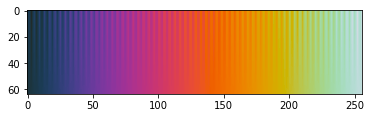

In [996]:
plt.imshow(test_image, cmap=cmap)

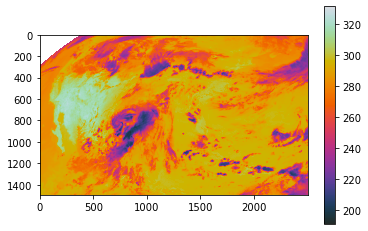

In [997]:
plt.imshow(test_ds.CMI_C13, cmap=cmap)
plt.colorbar()

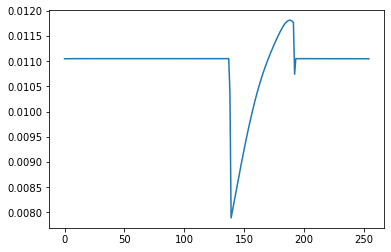

In [998]:
plt.plot(get_cmap_deltae(cmap))

In [1016]:
def plot_cmap_diffs(cmap):
    plt.figure()
    ax1 = plt.subplot(2,1,1)
    plt.plot(get_cmap_deltae(cmap))
    plt.ylim([0,0.03])
    plt.title(cmap.name)
    plt.subplot(2,1,2,sharex=ax1)
    plt.imshow(test_image, cmap=cmap)

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


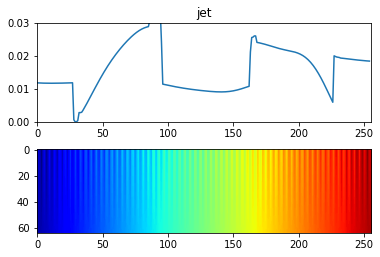

In [1017]:
plot_cmap_diffs(cm.jet)

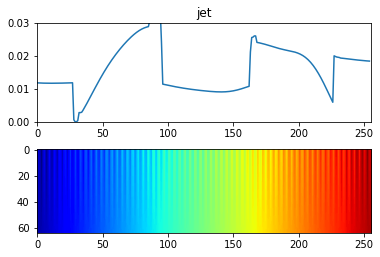

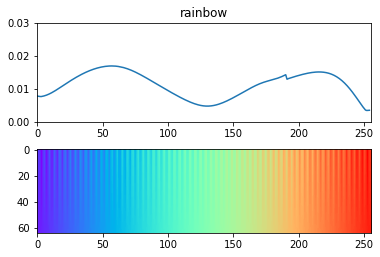

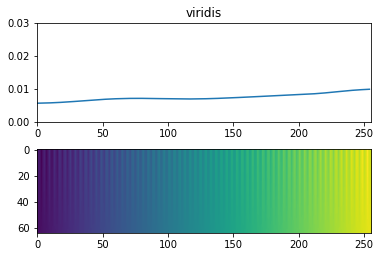

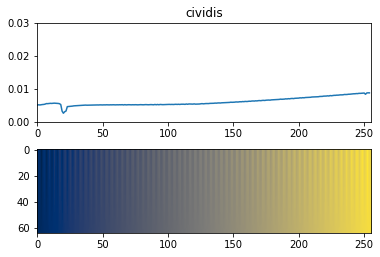

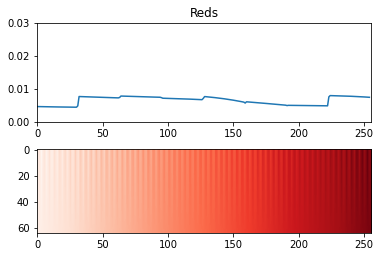

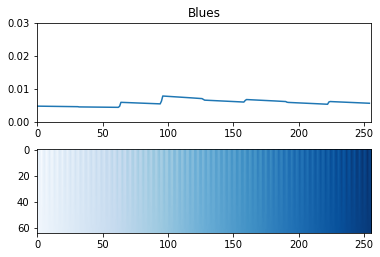

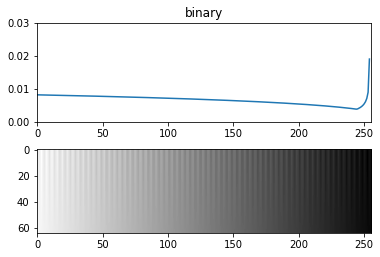

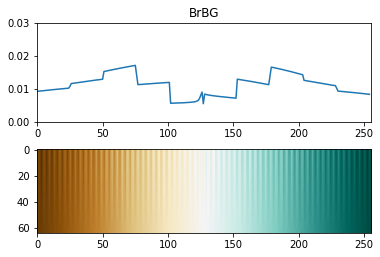

In [1022]:
for cmap in [cm.jet, cm.rainbow, cm.viridis, cm.cividis, cm.Reds, cm.Blues, cm.binary, cm.BrBG]:
    plot_cmap_diffs(cmap)

In [1054]:
n_points = 32

rgb_gamut = np.concatenate(
    [np.stack(np.meshgrid([0,1],np.linspace(0,1,n_points),np.linspace(0,1,n_points), indexing='ij'),-1).reshape((-1,3)),
     np.stack(np.meshgrid(np.linspace(0,1,n_points),[0,1],np.linspace(0,1,n_points), indexing='ij'),-1).reshape((-1,3)),
     np.stack(np.meshgrid(np.linspace(0,1,n_points),np.linspace(0,1,n_points),[0,1], indexing='ij'),-1).reshape((-1,3))])
     

In [1055]:
rgb_gamut.shape

(6144, 3)

In [1056]:
jab_rgb_gamut = rgb_to_jab(rgb_gamut)

<IPython.core.display.Javascript object>


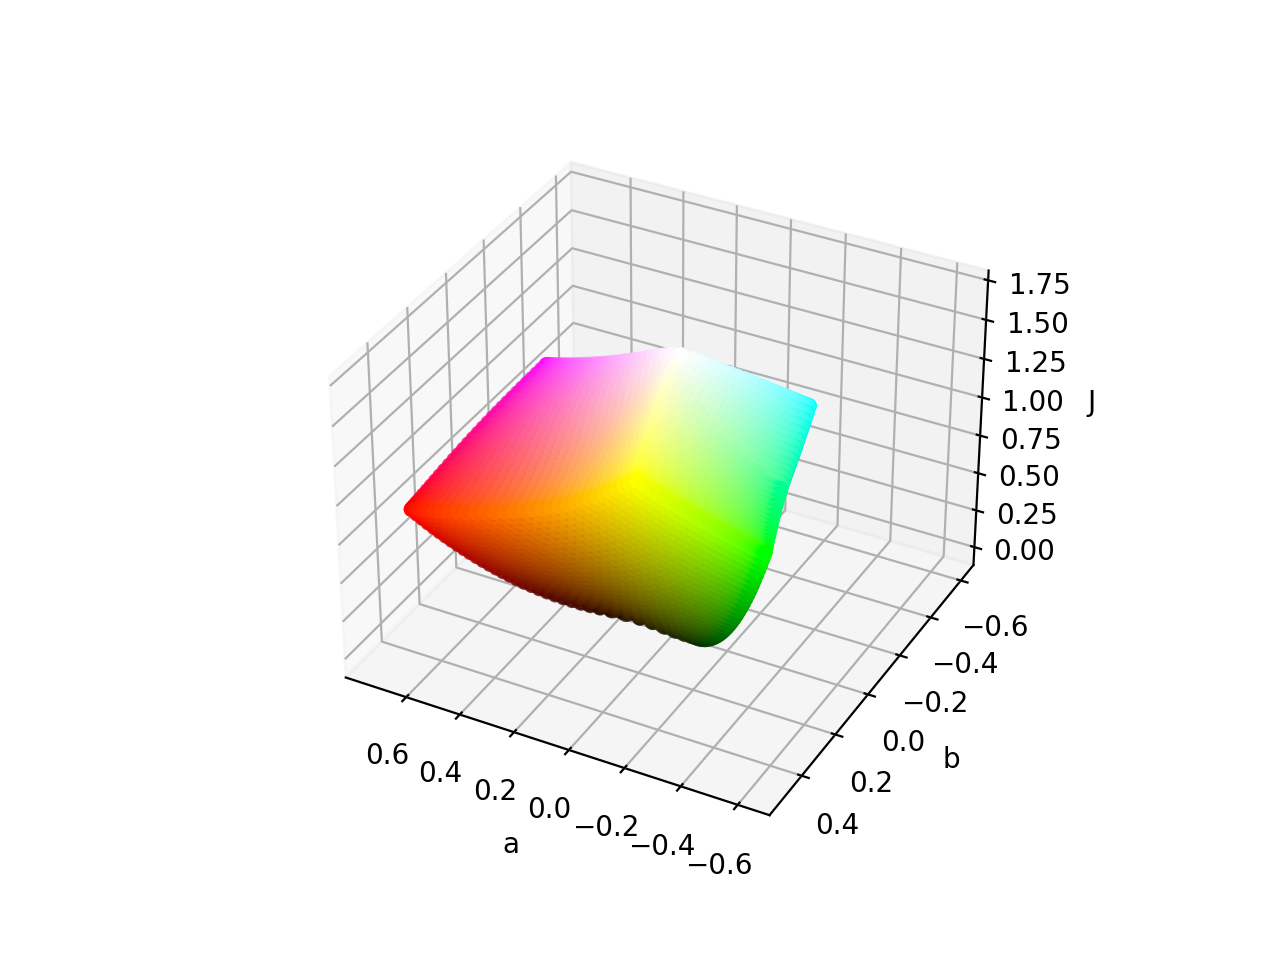

Text(0.5, 0, 'J')

In [1057]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(jab_rgb_gamut[...,1], jab_rgb_gamut[...,2], jab_rgb_gamut[...,0], c=rgb_gamut)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('J')
